In [ ]:
import os
import numpy as np
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy #existing implementation from https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback
import torch

In [6]:
os.makedirs("PPOresults", exist_ok=True)
os.makedirs("PPOresults/logs", exist_ok=True)
os.makedirs("PPOresults/checkpoints/", exist_ok=True)
os.makedirs("PPOresults/best_model/", exist_ok=True)

# Initialize environment
env = gym.make("HalfCheetah-v4")
eval_env = gym.make("HalfCheetah-v4")

# Custom callback for evaluation with exploration for first 1000 timesteps
class CustomEvalCallback(EvalCallback):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.means = []
        self.stds = []
        self.timesteps = []
        self.current_timesteps = 0
    
    def _on_step(self) -> bool:
        self.current_timesteps += 1
        return super()._on_step()
    
    def _on_event(self) -> bool:
        # Perform evaluation using parent method
        mean_reward, std_reward = evaluate_policy(
            self.model,
            self.eval_env,
            n_eval_episodes=10,
            deterministic=True  # No exploration noise during evaluation
        )
        
        self.timesteps.append(self.num_timesteps)
        self.means.append(mean_reward)
        self.stds.append(std_reward)
        
        # Save current results
        eval_data = {
        'timesteps': np.array(self.timesteps),
        'returns_mean': np.array(self.means),
        'returns_std': np.array(self.stds),
        }
        np.save("PPOresults/ppo_results.npy", eval_data)
        
        return True

# Create PPO model
model = PPO(
    "MlpPolicy",
    env,
    verbose=1
)

# Setup evaluation callback to evaluate every 500 timesteps
eval_callback = CustomEvalCallback(
    eval_env=eval_env,
    best_model_save_path="./best_model/",
    log_path="./logs/",
    eval_freq=500,
    deterministic=True,
    render=False
)

# Setup checkpoint callback to save model periodically
checkpoint_callback = CheckpointCallback(
    save_freq=5000,
    save_path="PPOresults/checkpoints/",
    name_prefix="ppo_halfcheetah",
    save_replay_buffer=True,
    save_vecnormalize=True
)

# Train the model with both callbacks
model.learn(
    total_timesteps=int(1e5),
    callback=[eval_callback, checkpoint_callback]
)

# Save the final model
model.save("final_ppo_halfcheetah")

# Print evaluation results
print("Training complete!")
print(f"Final evaluation mean reward: {eval_callback.means[-1]:.2f} ± {eval_callback.stds[-1]:.2f}")

c:\Users\forge\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\envs\registration.py:517: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(
c:\Users\forge\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\forge\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=500, episode_reward=-0.05 +/- 0.76
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | -0.0501  |
| time/              |          |
|    total_timesteps | 500      |
---------------------------------
New best mean reward!
Eval num_timesteps=1000, episode_reward=-0.61 +/- 0.96
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | -0.606   |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=1500, episode_reward=-0.39 +/- 0.32
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | -0.395   |
| time/              |          |
|    total_timesteps | 1500     |
---------------------------------
E

IndexError: list index out of range

In [16]:
data=np.load('logs/evaluations.npz',allow_pickle=True)
print(data['timesteps'])

[   500   1000   1500   2000   2500   3000   3500   4000   4500   5000
   5500   6000   6500   7000   7500   8000   8500   9000   9500  10000
  10500  11000  11500  12000  12500  13000  13500  14000  14500  15000
  15500  16000  16500  17000  17500  18000  18500  19000  19500  20000
  20500  21000  21500  22000  22500  23000  23500  24000  24500  25000
  25500  26000  26500  27000  27500  28000  28500  29000  29500  30000
  30500  31000  31500  32000  32500  33000  33500  34000  34500  35000
  35500  36000  36500  37000  37500  38000  38500  39000  39500  40000
  40500  41000  41500  42000  42500  43000  43500  44000  44500  45000
  45500  46000  46500  47000  47500  48000  48500  49000  49500  50000
  50500  51000  51500  52000  52500  53000  53500  54000  54500  55000
  55500  56000  56500  57000  57500  58000  58500  59000  59500  60000
  60500  61000  61500  62000  62500  63000  63500  64000  64500  65000
  65500  66000  66500  67000  67500  68000  68500  69000  69500  70000
  7050

In [18]:
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
def plot_ppo_results(path, smoothing_window=5, figsize=(10, 6), save_plot=True):
    """
    Plots the PPO training results with standard deviation fill and uniform smoothing.
    Works with the evaluations.npz file from Stable Baselines logs.
    
    Args:
        logs_dir (str): Directory containing the evaluations.npz file
        smoothing_window (int): Size of the window for uniform smoothing
        figsize (tuple): Figure size (width, height)
        save_plot (bool): Whether to save the plot to a file
    
    Returns:
        plt.Figure: The figure object
    """
    # Find the evaluations.npz file
    
    # Load the evaluation data
    data = np.load(path)
    
    # Extract the relevant information
    # The structure is typically:
    # 'timesteps': array of timesteps when evaluations were performed
    # 'results': 2D array of shape (n_eval_timesteps, n_eval_episodes)
    # 'ep_lengths': 2D array of episode lengths
    timesteps = data['timesteps']
    
    # Results contains rewards for each episode at each evaluation timestep
    # We need to calculate mean and std for each timestep
    results = data['results']
    
    # Calculate mean and std across episodes for each timestep
    means = np.mean(results, axis=1)
    stds = np.std(results, axis=1)
    
    # Apply uniform smoothing to the means
    if len(means) > smoothing_window:
        smoothed_means = uniform_filter1d(means, size=smoothing_window)
    else:
        smoothed_means = means
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the smoothed means
    ax.plot(timesteps, smoothed_means, color='blue', linewidth=2, label=f'Mean Reward (Smoothed, window={smoothing_window})')
    
    # Add the original means as a lighter line
    ax.plot(timesteps, means, color='lightblue', alpha=0.5, linewidth=1, label='Mean Reward (Raw)')
    
    # Add the standard deviation fill
    ax.fill_between(
        timesteps, 
        smoothed_means - stds,
        smoothed_means + stds,
        color='blue',
        alpha=0.2,
        label='Standard Deviation'
    )
    
    # Add vertical line to show the transition from exploration to exploitation (at 1000 timesteps)
    ax.axvline(x=1000, color='red', linestyle='--', label='Exploration Phase End')
    
    # Set labels and title
    ax.set_xlabel('Timesteps', fontsize=12)
    ax.set_ylabel('Reward', fontsize=12)
    ax.set_title('PPO Training on HalfCheetah-v4', fontsize=14)
    
    # Add grid and legend
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    
    # Improve the layout
    plt.tight_layout()
    
    # Save the figure if requested
    if save_plot:
        os.makedirs("PPOresults", exist_ok=True)
        plt.savefig(os.path.join("PPOresults", 'ppo_training_results.png'), dpi=300)
        print(f"Plot saved to {os.path.join('PPOresults', 'ppo_training_results.png')}")
    
    return fig

Plot saved to PPOresults\ppo_training_results.png


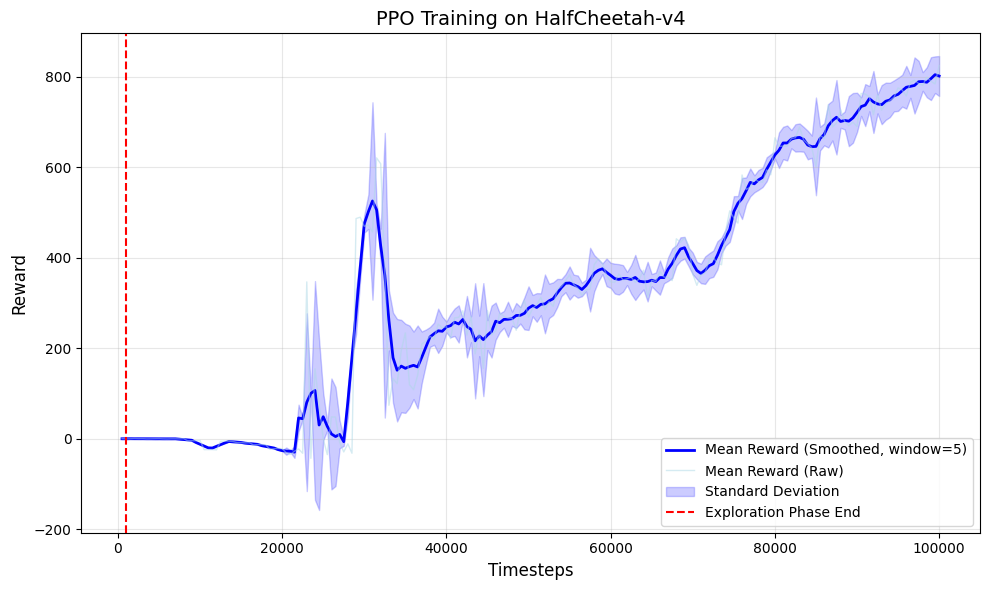

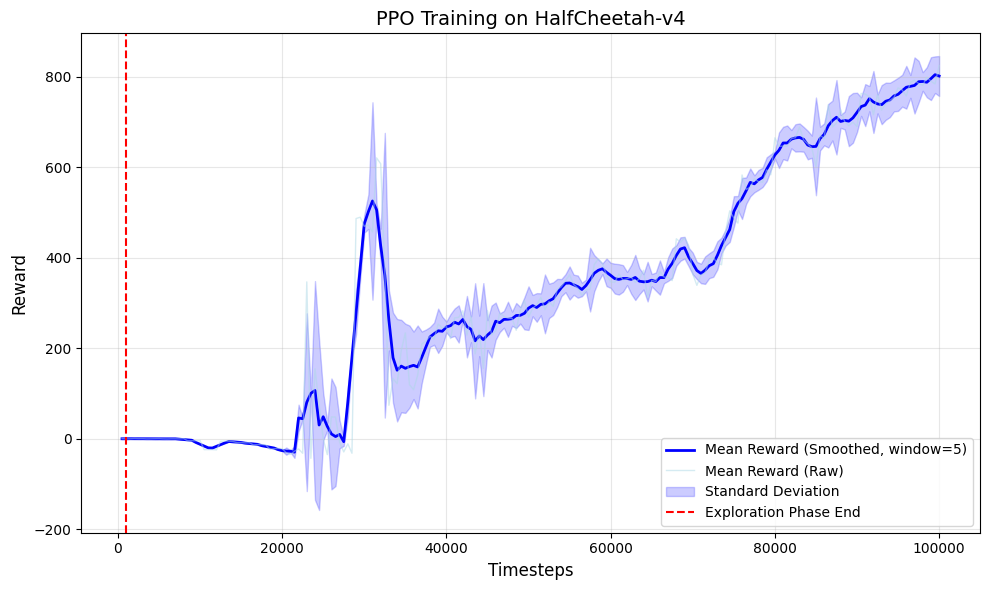

In [19]:
path='logs/evaluations.npz'
plot_ppo_results(path)